Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering


### Trabalho Final: Shear Building

[1.   Introdução](#section_1)   
[2.   Características do Modelo Reduzido](#section_2)   
[2.1. Cálculo da Frequencia Natural do Modelo](#section_21)    
[3.   Estrutura Real](#section_3)    
[4.   Análise de Propagação de Erro](#section_4)    
[5.   Intrumentação](#section_5)      
[6.   Análise do Sinal](#section_6)     
[7.   Conclusões](#section_7)    

---
_Flávio Antônio Ferreira, Doutorando_   
_José Lucas Silva Borges, Mestrando_    
_Porto Alegre, RS, Brazil_ 


In [3]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as sc
import scipy.stats as st
from MRPy import *

# Importing pandas dataframe with dimension exponents for relevant quantities
DimData = pd.read_excel('resources/DimData.xlsx', sheet_name='DimData', index_col=0)
pi = np.pi;
#print(DimData)

### 1. Introdução <a name="section_1"></a> 

Este trabalho consiste no ensaio de um modelo reduzido existente, feito em alumínio, que representa um Shear Building de 2 pavimentos, onde será utilizado um servo-motor para excitar a estrutura em sua frequência natural. Na sequencia serão realizados os cálculos de uma estrutura real em concreto armado que poderia ser representada por esse modelo.


### 2. Características do Modelo Reduzido <a name="section_2"></a> 

Para a construção do modelo, utilizou-se tiras de chapa de alumínio, de seção $ 20 \times 0.5 mm $. O comprimento destas tiras é 40 cm. Para representar as massas dos pavimentos, serão utilizadas cantoneiras de alumínio, de massa por comprimento linear igual a $4.1g/cm$. Para representar os engastes, serão utilizadas 12 presilhas( 6 em cada pavimento) junto a 4 suportes de alumínio (2 por pavimento) feitos com a mesma cantoneira que representa a laje do pavimento.

<img src="resources/shear building3.png" alt="sag_tension" width="240px"/>

O modelo reduzido a ser utilizado tem as seguintes caracterísitcas:

* Dimensões das Colunas:    
  $B \times H = 5 \times 20 {\rm mm}$  
* Altura das Colunas:    
  $L_{\rm 1} = 160  {\rm mm}$    
* Propriedades da Seção Transversal:    
  $A = 10{\rm mm}^2$ e $I = 208,3 \times 10^{-3}{\rm mm}^4$ <br>
* Peso Específico do Alumínio:    
  $\rho_{\rm al} = 7850 {\rm kg/m}^3$    
* Módulo de Elasticidade do Alumínio:    
  $E_{\rm al} = 71 \times 10^{9} {\rm N/m}^2$ 
* Rigidez à flexão:   
  $E_{\rm al}\times I = 4.27 \times 10^{-2} Nm^2 $
* Massa do Pavimento Superior:    
  $m_{\rm 1} = 128  {g}$ 
* Massa do Pavimento Inferior:    
  $m_{\rm 2} = 105  {g}$ 

<img src="resources/shear building1.png" alt="sag_tension" width="480px"/>
<img src="resources/shear building2.png" alt="sag_tension" width="480px"/>


### 2.1 Cálculo da Frenquencia Natural do Modelo <a name="section_21"></a> 

### 2.1.1 Parâmetros Iniciais <a name="section_2"></a> 


In [54]:
L  = 0.16
EI = 71e9*(0.02*0.0006**3)/12
k  = 12*EI/L/L/L

m1 = .141577802500





m2 = .126836505000



print (m2/m1)

0.8958784693666932


### 2.1.2 Matrizes de Rigidez e de Massa <a name="section_2"></a> 


In [55]:

# Stiffness coefficients in N/m
K = np.array ([[ 2*k, -2*k], 
               [-2*k,  4*k]])


# Lumped mass matrix in kg


M = np.array([ [m1,  0,], 
               [0,  m2,]])

print ("Matriz de rigidez\n",K)
print ("\nMatriz de Massa (lumped)\n",M)

Matriz de rigidez
 [[ 149.765625 -149.765625]
 [-149.765625  299.53125 ]]

Matriz de Massa (lumped)
 [[0.1415778 0.       ]
 [0.        0.1268365]]


### 2.1.3 Frequencias e Modos de Vibração <a name="section_2"></a> 


First vibration mode:   3.25Hz, [ 0.855  0.519]
Second vibration mode:  8.72Hz, [-0.478  0.879]


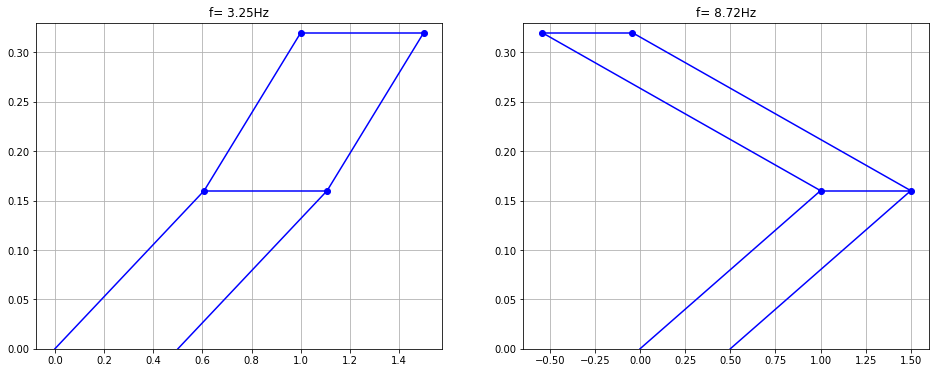

In [56]:
# Uses scipy to solve the standard eigenvalue problem
w2, Phi = sc.eig(K, M)

# Ensure ascending order of eigenvalues
iw  = w2.argsort()
w2  = w2[iw]
Phi = Phi[:,iw]

# Eigenvalues to vibration frequencies
wk  = np.sqrt(np.real(w2)) 
fk  = wk/2/np.pi

print('First vibration mode:  {0:5.2f}Hz, [{1:6.3f} {2:6.3f}]'.format(fk[0], *Phi[:,0]))
print('Second vibration mode: {0:5.2f}Hz, [{1:6.3f} {2:6.3f}]'.format(fk[1], *Phi[:,1]))

## Plotagem dos 3 primeiros modos de vibração da estrutura
plt.figure(1, figsize=(16,6))
x = np.linspace(0,2*L,3)

for k in range(2):
    pk = np.zeros(3)
    pk[1:] = Phi[::-1,k]
    pk /=np.max(np.abs(pk))
    plt.subplot(1,2,k+1)
    
    ## Linhas Horizontais
    for n in range(2):
        o = np.linspace(pk[n+1],pk[n+1]+.5,2)
        y1 = np.ones(2)*n*L+L
        plt.plot(o, y1, 'b')
    
    ## Pontos
    plt.plot(pk[1:],x[1:],'bo')
    plt.plot(pk[1:]+.5, x[1:], 'bo')
    
    ## Linhas Verticais
    plt.plot(pk,x,'b')
    plt.plot(pk+.5, x,'b')

#    plt.xlim(-1.5, 1.5); plt.ylabel("Altura [cm]");
    plt.ylim( 0.0, 2*L+.01);
    plt.title('f= {0:3.2f}Hz'.format(fk[k]));
    plt.grid(True)

### 3. Estrutura Real <a name="section_3"></a> 

Para efeturar os cálculos da estrutura real será necessário definir as 3 grandezas que formarão a nova base da matriz dimensional. Para o ensaio de excitar o modelo com suas frequências naturais, utiliza-se como nova base as grandezas de comprimento, aceleração e rigidez à flexão.
Partiremos do premissa que os pavimentos do edifífio real tem massa de 30000kg

In [67]:
ABC    = ['L', 'a', 'm']           
LMT    = ['L', 'M', 'T']           
base   =  DimData.loc[ABC, LMT]    
i_base =  np.linalg.inv(base)      

print(base)
#print(i_base)

   L  M  T
L  1  0  0
a  1  0 -2
m  0  1  0


As escalas para as grandezas adotadas para a nova base são:

In [68]:
λ_L    =  25/1               # Escala de comprimento do modelo real
λ_a    =  1/1                # Escala de aceleração (gravidade)
λ_m   =   (30*10**6)/128.80952       # Escala de massa


Agora calcula-se as escalas para quantidades adicionais relevantes para construir a estrutura real e interpretar os resultados. Eles podem ser frequencias, f, rigidez à flexão, EI e a massa de cada pavimento, m. Primeiramente, preparamos a matriz dimensional para as quantidades selecionadas:

In [69]:
par    = ['f', 'EI', 'm', 'P']                    # selected scales to be calculated
npar   =  len(par)                           # number of quantities
DimMat =  DimData.loc[par, LMT]              # the dimensional matrix

print(DimMat)
#print(i_base)                               

    L  M  T
f   0  0 -1
EI  3  1 -2
m   0  1  0
P   2  1 -3


Em seguida, altera-se a base da matriz dimensional:

In [70]:
scales =  np.tile([λ_L, λ_a, λ_m],(npar,1))  # prepare for calculations

NewMat = pd.DataFrame(data    = np.dot(DimMat, i_base),
                      index   = DimMat.index,
                      columns = ABC)
print(NewMat)

      L    a    m
f  -0.5  0.5  0.0
EI  2.0  1.0  1.0
m   0.0  0.0  1.0
P   0.5  1.5  1.0


E finalmente, calcula-se as correspondentes escalas:

In [71]:
[λ_f, λ_EI, λ_m, λ_P]  = np.prod(scales**NewMat, axis=1);

print('Escala de Frequencia:  λ_f  = 1:{0:4.2f}'.format(1/λ_f),  '\n'
      'Escala de Rigidez:     λ_EI = 1:{0:4.10f}'.format(1/λ_EI), '\n'
      'Escala de Massa:       λ_m  = 1:{0:4.10f}'.format(1/λ_m),  '\n'
      'Escala de Potencia:    λ_P  = 1:{0:4.10f}'.format(1/λ_P))

Escala de Frequencia:  λ_f  = 1:5.00 
Escala de Rigidez:     λ_EI = 1:0.0000000069 
Escala de Massa:       λ_m  = 1:0.0000042937 
Escala de Potencia:    λ_P  = 1:0.0000008587


In [72]:
print('Massa do Pavimento:      {0:5.0f}kg'.format(m1*λ_m))
print('Rigidez da Estrutura:    {0:5.0f}Nm²'.format(EI*λ_EI))
print('Comprimento da Coluna:   {0:5.2f}m'.format(L*λ_L))
print('Primeira Frequencia:     {0:5.2f}Hz'.format(fk[0]*λ_f))
print('Segunda Frequencia:      {0:5.2f}Hz'.format(fk[1]*λ_f))


Massa do Pavimento:      32974kg
Rigidez da Estrutura:    3720610Nm²
Comprimento da Coluna:    4.00m
Primeira Frequencia:      0.65Hz
Segunda Frequencia:       1.74Hz


A seguir calcula-se as dimensões da coluna da estrutura real em concreto armado:

* Altura das Colunas:    
  $L_{\rm 1} = 4.0  {\rm m}$    
* Peso Específico do Concreto:    
  $\rho_{\rm c} = 2500 {\rm kg/m}^3$    
* Módulo de Elasticidade do Concreto:    
  $E_{\rm c} = 30 \times 10^{9} {\rm N/m}^2$
  
 Supondo uma coluna de 15cm de lado, descobriremos a outra dimensão da coluna de concreto:
  
  $$E_{\rm c}\times I_{\rm c} = E_{\rm c}\times \left ( \frac {b \times h^{3}}{12} \right)$$
  
  $$b = \frac {12 \times E_{\rm c}\times I_{\rm c}} {E_{\rm c} \times h^{3}}$$
  



In [73]:
Ec = 30*10**9
h  = 15 
b = 12*EI*λ_EI/(Ec*(h/100)**3)/2

print('Largura da coluna:      {0:5.2f}cm'.format(b*100))

Largura da coluna:      22.05cm


### 4. Análise de Propagação de Erro <a name="section_4"></a> 

XXX

In [74]:
m_e = [ 0.55, 0.60, 0.65, 0.60, 0.65, 0.60, 0.60, 0.65, 0.55, 0.6, 0.6, 0.6]        #espessura das colunas em mm
m_L = [20.60,20.40,20.90,21.00,20.70,20.70,20.30,20.10,20.20,20.4,20.3,20.3]   #largura das colunas mm

mi_e = np.mean(m_e)
sigma_e = np.std(m_e)

mi_L = np.mean(m_L)
sigma_L = np.std(m_L)

print('--------------------------------------------','\n',
      'Espessura média da coluna:           {0:5.5f}mm'.format(mi_e),'\n',
      'Desvio padrão da espessura:         {0:5.5f}mm'.format(sigma_e),'\n',
      'Largura média da coluna:            {0:5.5f}mm'.format(mi_L),'\n',
      'Desvio padrão da largura:          {0:5.5f}mm'.format(sigma_L),'\n',
      '--------------------------------------------')

-------------------------------------------- 
 Espessura média da coluna:           0.60417mm 
 Desvio padrão da espessura:         0.03200mm 
 Largura média da coluna:            20.49167mm 
 Desvio padrão da largura:          0.27221mm 
 --------------------------------------------


In [77]:
E = 71e9
#----------------------------------#
h = st.norm(mi_e/1000,sigma_e/1000)
b = st.norm(mi_L/1000,sigma_L/1000) 
    
def autoval(E,b,h,L,m1,m2):
    I = (b*h**3)/12
    K = 12*E*I/(L*L*L)
    M_K = np.array([[2*K,-2*K],
                   [-2*K, 4*K]])
    
    M = np.array([ [m1,  0,], 
               [0,  m2,]])
    w21,Phi1 = sc.eig(M_K,M)



    iw = w21.argsort()
    w21 = w21[iw]                       
    Phi1 = Phi1[:,iw]

    wr = np.real(w21)
    wk = np.sqrt(w21)
    fk = wk/(2*np.pi)
    
    return fk[0],fk[1]
#------------------------------------#
n = 100000
hh = h.rvs(n)
bb = b.rvs(n)

fi = []
fi2 = []

for i in range(n):
    
    f1,f2 = autoval(E,bb[i],hh[i],L,m1,m2)
    fi += [f1]
    fi2 += [f2]
    
mi_f = np.mean(fi)
sigma_f = np.std(fi)
print('---------------------------------------','\n',
      'Valor médio da frequência:    {0:5.2f}hz'.format(np.real(mi_f)),'\n',
      'Valor do erro:                {0:5.2f}hz' .format(sigma_f),'\n',
      'Coeficiente de variação:      {0:5.2f}%'.format(sigma_f/np.real(mi_f)*100),'\n',
      '--------------------------------------')

mi_f2 = np.mean(fi2)
sigma_f2 = np.std(fi2)
print('---------------------------------------','\n',
      'Valor médio da frequência:    {0:5.2f}hz'.format(np.real(mi_f2)),'\n',
      'Valor do erro:                {0:5.2f}hz' .format(sigma_f2),'\n',
      'Coeficiente de variação:      {0:5.2f}%'.format(sigma_f2/np.real(mi_f2)*100),'\n',
      '--------------------------------------')

--------------------------------------- 
 Valor médio da frequência:     3.32hz 
 Valor do erro:                 0.26hz 
 Coeficiente de variação:       7.96% 
 --------------------------------------
--------------------------------------- 
 Valor médio da frequência:     8.93hz 
 Valor do erro:                 0.71hz 
 Coeficiente de variação:       7.96% 
 --------------------------------------


### 5. Instrumentação <a name="section_5"></a> 

XXXX

### 5. Análise do Sinal <a name="section_6"></a> 

XXX

### 7. Conclusões <a name="section_7"></a> 

XXX